In [1]:
import numpy as np
from sklearn import datasets

## Load the dataset

In [13]:
iris  = datasets.load_iris()
X = iris.data
y = iris.target
print("Size of the dataset", X.shape)
print("Size of the dataset", y.shape)



Size of the dataset (150, 4)
Size of the dataset (150,)


## Display the feature names ant Target Class

In [4]:
input_features = iris.feature_names
print("Input Features ", input_features)
target_class = iris.target_names
print("Output Class", target_class)

Input Features  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Output Class ['setosa' 'versicolor' 'virginica']


In [15]:
unique,counts = np.unique(iris.target, return_counts = True)
print(unique,counts)

[0 1 2] [50 50 50]


## Plot the Data

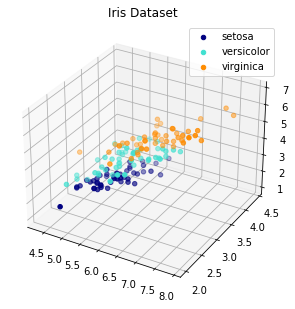

In [5]:
import matplotlib.pyplot as plt
colors = ['navy','turquoise','darkorange']
fig = plt.figure(figsize=(5,5))
ax  =  fig.add_subplot(111,projection= '3d')
plt.title("Iris Dataset")
for color , i, target_name in zip(colors,[0,1,2],target_class):
    ax.scatter(X[y == i, 0],X[y == i, 1],X[y == i, 2], color=color, label = target_name )
plt.legend(loc='best')
plt.show()

## Split the dataset into Train and Test Dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

## Apply LDA to reduce the number of features from 4 to 2

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components  = 2)
lda.fit(X_train, y_train)
x_transform = lda.transform(X_train)
print("Number of Features before LDA: ", X_train.shape[1])
print("Number of Features after LDA : ", x_transform.shape[1])

Number of Features before LDA:  4
Number of Features after LDA :  2


## Input LDA feature set into the Decision Tree Classifier

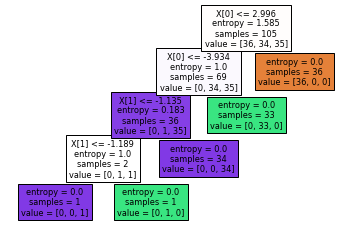

<Figure size 72000x72000 with 0 Axes>

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(criterion = 'entropy')
clf = tree.fit(x_transform, y_train)
plot_tree(clf, filled=True)
plt.figure(figsize = (1000,1000))
plt.show()

## Plot the predicted target class using Decision Tree Algorithm


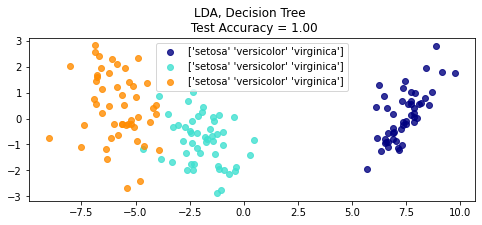

In [26]:
from sklearn.metrics import accuracy_score
X_test_transform = lda.transform(X_test)
pred_y_test  = clf.predict(X_test_transform)
acc = accuracy_score(y_test,pred_y_test)

plt.figure(figsize = (8,3))
for color , i, target_name  in zip(colors, [0,1,2], target_class):
    plt.scatter(X_full_transform[y == i, 0], X_full_transform[y == i, 1], alpha = 0.8, color = color, label = target_class)

plt.legend(loc='best')
plt.title("LDA, Decision Tree \n Test Accuracy = {:.2f}".format(acc))
plt.show()


## Build the classification report

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_test,pred_y_test)
cm = confusion_matrix(y_test, pred_y_test)
print("Classification report:")
print(report)
print("Confusion Matrix")
print(cm)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix
[[14  0  0]
 [ 0 16  0]
 [ 0  0 15]]


In [1]:
import os
os.getcwd()

'C:\\Users\\venka'